In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:

def simulate_predator_prey(F, G, Q, x0, u_seq=None, N=150, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)

    x_data = np.zeros((N+1, 2))
    x_data[0] = x0

    if u_seq is None:
        u_seq = np.zeros(N)

    for k in range(1, N+1):
        w = np.random.multivariate_normal([0, 0], Q)
        x_data[k] = F @ x_data[k-1] + G.flatten() * u_seq[k-1] + w

    return x_data


In [3]:

def kalman_filter(F, H, Q, R, x0, P0, z_seq):
    N = len(z_seq)
    x_est = np.zeros((N, 2))
    P_est = np.zeros((N, 2, 2))
    innovation = np.zeros((N, 2))

    x_est[0] = x0
    P_est[0] = P0

    for k in range(1, N):
        x_pred = F @ x_est[k-1]
        P_pred = F @ P_est[k-1] @ F.T + Q

        y = z_seq[k] - H @ x_pred
        S = H @ P_pred @ H.T + R
        K = P_pred @ H.T @ np.linalg.inv(S)
        x_est[k] = x_pred + K @ y
        P_est[k] = P_pred - K @ H @ P_pred
        innovation[k] = y

    return x_est, P_est, innovation


In [4]:
F = np.array([[0.8, 0.3], [-0.3, 0.7]])
G = np.array([[0.1], [0.05]])
Q = np.array([[0.2, 0.0], [0.0, 0.2]])
H = np.eye(2)
R = np.array([[0.5, 0.0], [0.0, 0.7]])
x0 = np.array([30.0, 15.0])
P0 = np.eye(2) * 1
N = 150
random_seed = 42

x_data = simulate_predator_prey(F, G, Q, x0, N=N, random_seed=random_seed)
np.random.seed(random_seed)
z_data = x_data + np.random.multivariate_normal([0, 0], R, size=N+1)
x_est, P_est, innovation = kalman_filter(F, H, Q, R, x0, P0, z_data)

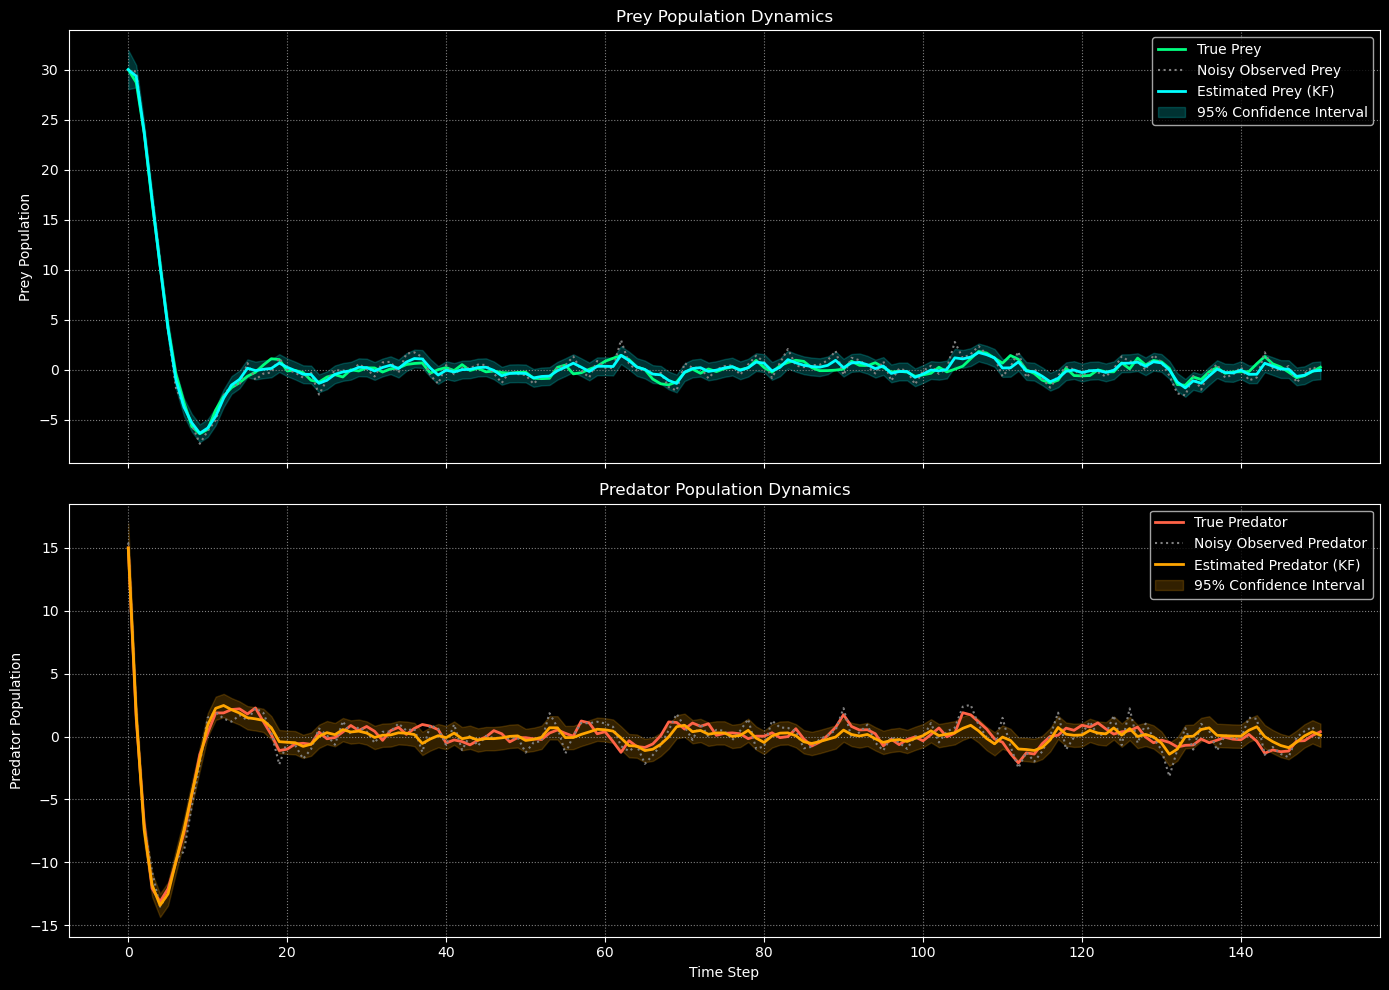

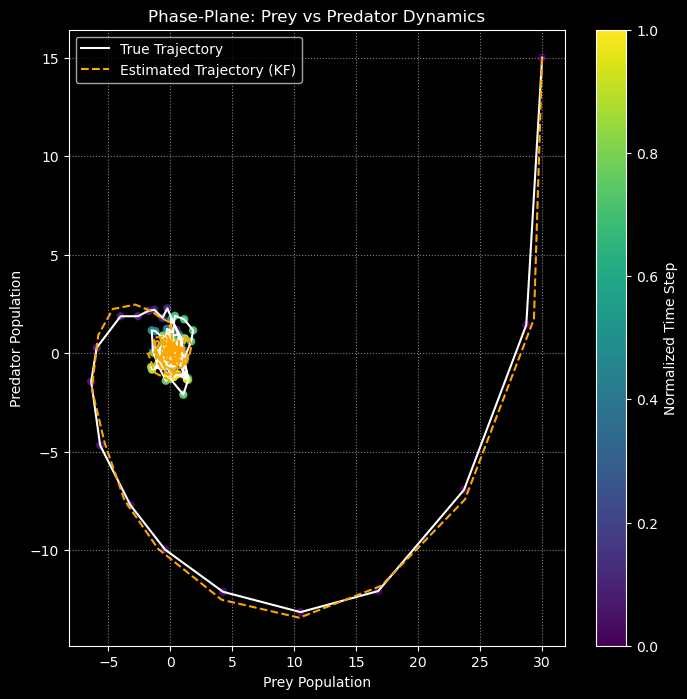

In [5]:
plt.style.use('dark_background')
time_axis = np.arange(N+1)


fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)


ax1.plot(time_axis, x_data[:, 0], label='True Prey', color='springgreen', linewidth=2)
ax1.plot(time_axis, z_data[:, 0], label='Noisy Observed Prey', color='gray', linestyle='dotted')
ax1.plot(time_axis, x_est[:, 0], label='Estimated Prey (KF)', color='cyan', linewidth=2)
ax1.fill_between(time_axis, 
                 x_est[:, 0] - 1.96 * np.sqrt(P_est[:, 0, 0]),
                 x_est[:, 0] + 1.96 * np.sqrt(P_est[:, 0, 0]),
                 color='cyan', alpha=0.2, label="95% Confidence Interval")

ax1.set_title("Prey Population Dynamics", color='white')
ax1.set_ylabel("Prey Population", color='white')
ax1.legend(loc='best', fontsize=10)
ax1.grid(True, color='gray', linestyle=':')
ax1.tick_params(axis='both', colors='white')

ax2.plot(time_axis, x_data[:, 1], label='True Predator', color='tomato', linewidth=2)
ax2.plot(time_axis, z_data[:, 1], label='Noisy Observed Predator', color='gray', linestyle='dotted')
ax2.plot(time_axis, x_est[:, 1], label='Estimated Predator (KF)', color='orange', linewidth=2)
ax2.fill_between(time_axis, 
                 x_est[:, 1] - 1.96 * np.sqrt(P_est[:, 1, 1]),
                 x_est[:, 1] + 1.96 * np.sqrt(P_est[:, 1, 1]),
                 color='orange', alpha=0.2, label="95% Confidence Interval")

ax2.set_title("Predator Population Dynamics", color='white')
ax2.set_xlabel("Time Step", color='white')
ax2.set_ylabel("Predator Population", color='white')
ax2.legend(loc='best', fontsize=10)
ax2.grid(True, color='gray', linestyle=':')
ax2.tick_params(axis='both', colors='white')

plt.tight_layout()
plt.show()


fig2, ax3 = plt.subplots(figsize=(8, 8))
ax3.plot(x_data[:, 0], x_data[:, 1], color='white', label='True Trajectory')
ax3.plot(x_est[:, 0], x_est[:, 1], color='orange', linestyle='dashed', label='Estimated Trajectory (KF)')
sc = ax3.scatter(x_data[:, 0], x_data[:, 1], c=np.linspace(0, 1, N+1), cmap='viridis', edgecolor='none')
cbar = plt.colorbar(sc)
cbar.set_label("Normalized Time Step", color='white')
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(cbar.ax.yaxis.get_ticklabels(), color='white')

ax3.set_title("Phase-Plane: Prey vs Predator Dynamics", color='white')
ax3.set_xlabel("Prey Population", color='white')
ax3.set_ylabel("Predator Population", color='white')
ax3.legend()
ax3.grid(True, color='gray', linestyle=':')
ax3.tick_params(axis='both', colors='white')

plt.show()


